In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

/Users/HuYao/anaconda3/envs/aiclub/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

In [3]:
data = pd.read_csv('../data/binary/data.csv', header=None)
Label = (data[0].values+1)/2
X = data[[1,2]].values
Y = Label.reshape([Label.shape[0],1])

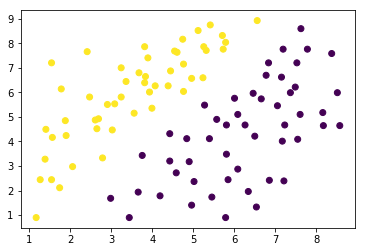

In [4]:
plt.scatter(X[:,0],X[:,1], c=Label)
plt.show()

In [ ]:
learning_rate = 0.01
training_epochs = 1000
display_step = 100

tf.reset_default_graph()

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2], name ='input') # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 1], name = 'output') # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([2, 1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# Construct model
#pred = tf.sigmoid(tf.matmul(x, W) + b) # sigmoid
h = tf.matmul(x, W) + b
# Minimize error using cross entropy
#cost = tf.reduce_mean(-tf.reduce_sum(tf.add(tf.multiply(y,tf.log(pred)),tf.multiply(1-y,tf.log(1-y)))))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=h))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


In [ ]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x: X, y: Y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={x: X, y:Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={x: X, y: Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    final_W = sess.run(W)
    final_b = sess.run(b)
    

In [ ]:
h = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.1)
v = np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.1)

H, V = np.meshgrid(h, v)
print(H.shape)
print(V.shape)
Z = sigmoid(H*final_W[0]+V*final_W[1]+final_b)

plt.scatter(X[:,0],X[:,1], c=Label, label='with boundary')
plt.contour(H,V,Z,1, cmap='jet')
plt.legend()
plt.show()
